# **Q1**

In [ ]:
from sklearn.decomposition import PCA
from pandas import DataFrame
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def show_DataFrame(dic, index):
    return DataFrame(dic, index=index).applymap(lambda x: (x[0], round(x[1], 2))).T.fillna(0)

In [ ]:
def plot_scatter(prjected_words_vectors, words, colors):
    plt.figure(figsize=(15,10))
    plt.scatter(prjected_words_vectors[:,0], prjected_words_vectors[:,1], linewidths=2, color=colors)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(prjected_words_vectors[i,0]-0.1, prjected_words_vectors[i,1]+0.08))

In [ ]:
wv_from_bin = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


## Question 1

In [ ]:
words = ['john', 'iran', 'laptop', 'notebook', 'mother']    # Question 1

similar_words = dict()
for word in words:
    similar_words[word] = sorted(wv_from_bin.most_similar(word), key=lambda item: item[1], reverse=True)

show_DataFrame(similar_words, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
john,"(william, 0.67)","(george, 0.66)","(james, 0.65)","(thomas, 0.64)","(smith, 0.6)","(j., 0.6)","(edward, 0.6)","(paul, 0.6)","(richard, 0.6)","(sir, 0.59)"
iran,"(tehran, 0.8)","(iranian, 0.79)","(syria, 0.68)","(nuclear, 0.66)","(iranians, 0.65)","(iraq, 0.65)","(ahmadinejad, 0.62)","(enrichment, 0.61)","(libya, 0.61)","(arabia, 0.6)"
laptop,"(laptops, 0.83)","(computers, 0.7)","(phones, 0.62)","(computer, 0.62)","(portable, 0.61)","(notebooks, 0.6)","(cellphones, 0.59)","(pcs, 0.58)","(ipods, 0.57)","(desktop, 0.57)"
notebook,"(notebooks, 0.62)","(laptop, 0.5)","(laptops, 0.45)","(pc, 0.45)","(fbn, 0.44)","(atlanta, 0.44)","(notes, 0.44)","(column, 0.43)","(journal, 0.43)","(diary, 0.42)"
mother,"(daughter, 0.86)","(wife, 0.86)","(grandmother, 0.84)","(husband, 0.81)","(sister, 0.8)","(father, 0.79)","(her, 0.78)","(daughters, 0.76)","(woman, 0.76)","(she, 0.75)"


## Question 2

In [ ]:
words_groups = [['john',    'alex',     'iran'],       # Question 2
                ['laptop',  'mac',      'diary'],
                ['glass',   'water',    'foot']]


distances = dict()
for w1, w2, w3 in words_groups:
    distances[w1] = [(w2, wv_from_bin.distance(w1, w2)), (w3, wv_from_bin.distance(w1, w3))]

show_DataFrame(distances, ['Near Word', 'Far Word'])

,Near Word,Far Word
john,"(alex, 0.68)","(iran, 0.95)"
laptop,"(mac, 0.69)","(diary, 0.74)"
glass,"(water, 0.6)","(foot, 0.72)"


## Question 3

In [ ]:
words_groups = [['king',        'woman',    'man' ],
                ['actor',       'girl',     'boy' ],
                ['doctor',      'she',      'he'  ],
                ['homemaker',   'she',      'he'  ],
                ['football',    'woman',    'man' ]]


first_distances = dict()
second_distances = dict()
for w1, w2, w3 in words_groups:
    first_distances[str((str(w1), w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w2], negative=[w3]), key=lambda item: item[1], reverse=True)
    second_distances[str((w1, w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w3], negative=[w2]), key=lambda item: item[1], reverse=True)

In [ ]:
show_DataFrame(first_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(queen, 0.7)","(princess, 0.61)","(monarch, 0.59)","(throne, 0.58)","(prince, 0.58)","(elizabeth, 0.55)","(daughter, 0.54)","(kingdom, 0.53)","(mother, 0.52)","(crown, 0.52)"
"('actor', 'girl', 'boy')","(actress, 0.87)","(starring, 0.71)","(actresses, 0.69)","(actors, 0.69)","(starred, 0.68)","(screenwriter, 0.63)","(comedian, 0.63)","(film, 0.61)","(movie, 0.6)","(filmmaker, 0.58)"
"('doctor', 'she', 'he')","(nurse, 0.7)","(mother, 0.6)","(woman, 0.6)","(her, 0.59)","(physician, 0.57)","(pregnant, 0.57)","(dr., 0.56)","(doctors, 0.56)","(patient, 0.55)","(hospital, 0.55)"
"('homemaker', 'she', 'he')","(housewife, 0.71)","(schoolteacher, 0.61)","(widowed, 0.55)","(businesswoman, 0.55)","(mom, 0.55)","(waitress, 0.53)","(hairdresser, 0.53)","(mother, 0.52)","(socialite, 0.52)","(grandmother, 0.51)"
"('football', 'woman', 'man')","(basketball, 0.67)","(soccer, 0.64)","(volleyball, 0.58)","(league, 0.55)","(softball, 0.55)","(hockey, 0.54)","(rugby, 0.53)","(ncaa, 0.52)","(club, 0.52)","(collegiate, 0.52)"


In [ ]:
show_DataFrame(second_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(prince, 0.55)","(ii, 0.54)","(brother, 0.54)","(iii, 0.53)","(reign, 0.53)","(uncle, 0.52)","(kingdom, 0.5)","(henry, 0.5)","(kings, 0.5)","(iv, 0.48)"
"('actor', 'girl', 'boy')","(comedian, 0.61)","(starring, 0.6)","(actors, 0.58)","(starred, 0.56)","(movie, 0.55)","(brother, 0.55)","(father, 0.55)","(film, 0.53)","(musician, 0.53)","(filmmaker, 0.52)"
"('doctor', 'she', 'he')","(physician, 0.66)","(surgeon, 0.57)","(doctors, 0.57)","(medical, 0.56)","(him, 0.54)","(dr., 0.54)","(himself, 0.53)","(his, 0.52)","(hospital, 0.52)","(man, 0.51)"
"('homemaker', 'she', 'he')","(43-year, 0.59)","(schoolteacher, 0.59)","(42-year, 0.55)","(housewife, 0.55)","(55-year, 0.54)","(48-year, 0.53)","(bricklayer, 0.53)","(47-year, 0.52)","(44-year, 0.52)","(39-year, 0.52)"
"('football', 'woman', 'man')","(soccer, 0.68)","(baseball, 0.64)","(team, 0.63)","(basketball, 0.62)","(league, 0.62)","(players, 0.61)","(rugby, 0.61)","(club, 0.6)","(game, 0.58)","(hockey, 0.58)"


## Question 4

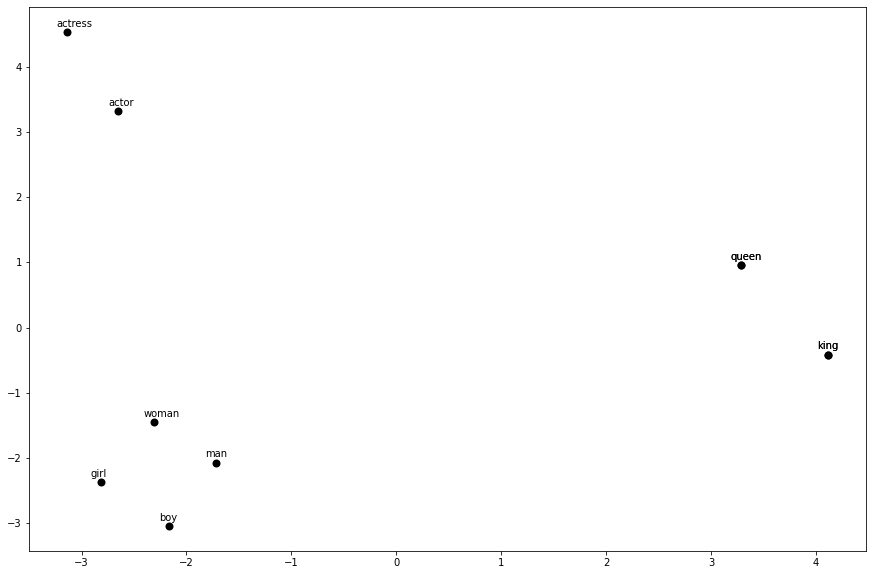

In [ ]:
words = ['woman', 'man', 'king', 'queen', 'boy', 'girl', 'actor', 'actress', 'king', 'queen']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')


## Question 5

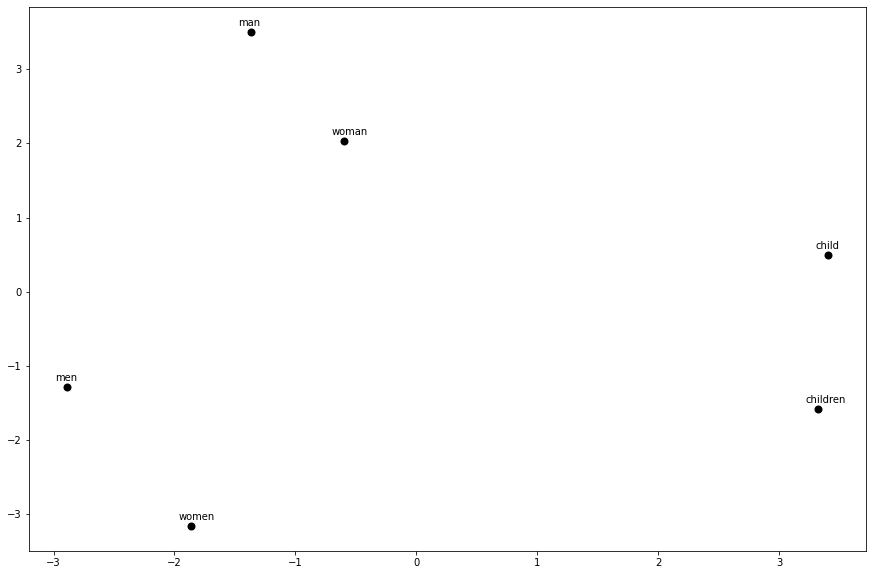

In [ ]:
# Question 5
words = ['child', 'children', 'woman', 'women', 'man', 'men']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')

## Question 6

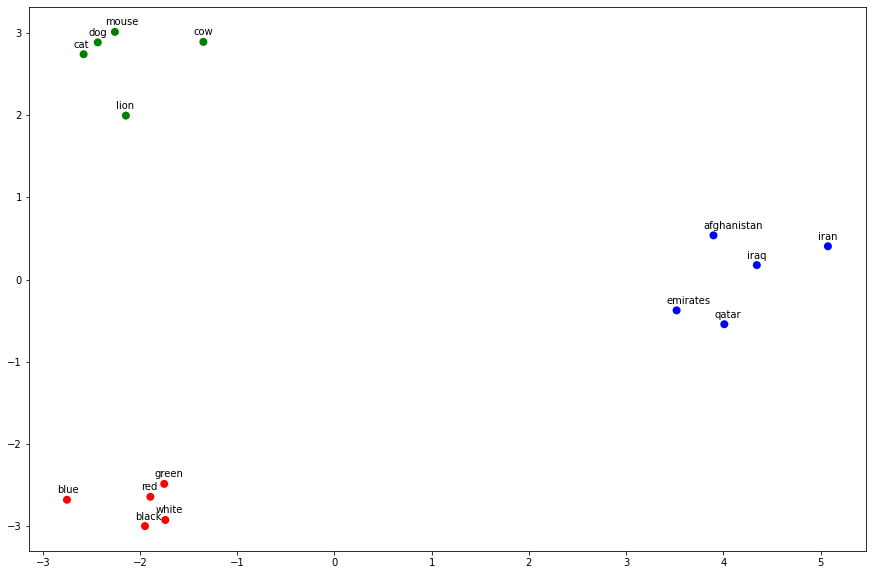

In [ ]:
words_group1 = ['cat', 'dog', 'mouse', 'cow', 'lion']
words_group2 = ['iran', 'iraq', 'qatar', 'emirates', 'afghanistan']
words_group3 = ['green', 'blue', 'red', 'white', 'black']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

## Question 7

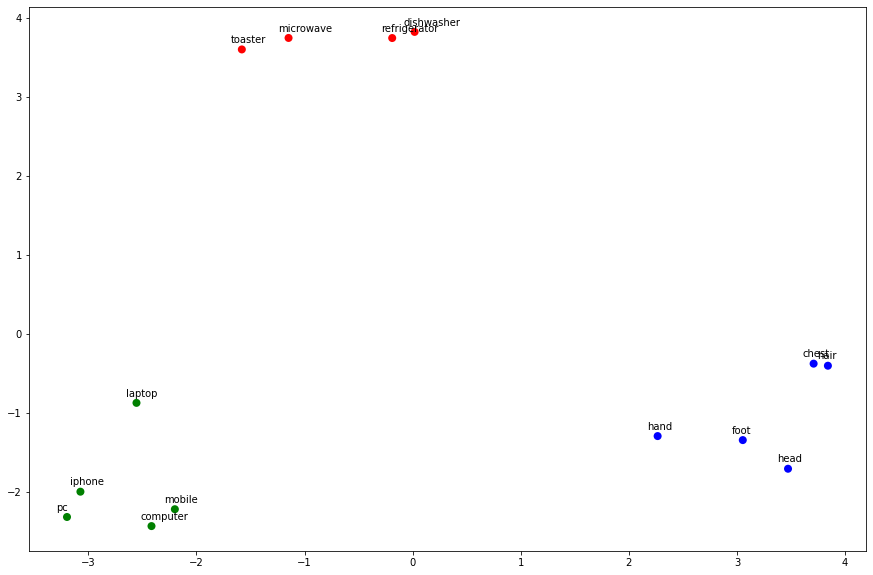

In [ ]:
# Question 7
words_group1 = ['laptop', 'iphone', 'pc', 'computer', 'mobile']
words_group2 = ['hand', 'foot', 'head', 'chest', 'hair']
words_group3 = ['refrigerator', 'dishwasher', 'microwave', 'toaster']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

## Question 8

In [ ]:
many_dict = dict()
many_dict[str(('many', 'cow', 'one'))] = wv_from_bin.most_similar(positive=['many', 'cow'], negative=['one'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('many', 'cow', 'one')","(cows, 0.64)","(cattle, 0.56)","(mad, 0.56)","(sheep, 0.56)","(pigs, 0.56)","(bovine, 0.56)","(herds, 0.56)","(beef, 0.53)","(chickens, 0.52)","(bse, 0.5)"


In [ ]:
many_dict = dict()
many_dict[str(('young', 'cow', 'old'))] = wv_from_bin.most_similar(positive=['young', 'cow'], negative=['old'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('young', 'cow', 'old')","(mad, 0.6)","(cows, 0.58)","(sheep, 0.52)","(pigs, 0.52)","(herd, 0.51)","(bovine, 0.5)","(cattle, 0.49)","(infected, 0.48)","(spongiform, 0.48)","(animals, 0.48)"


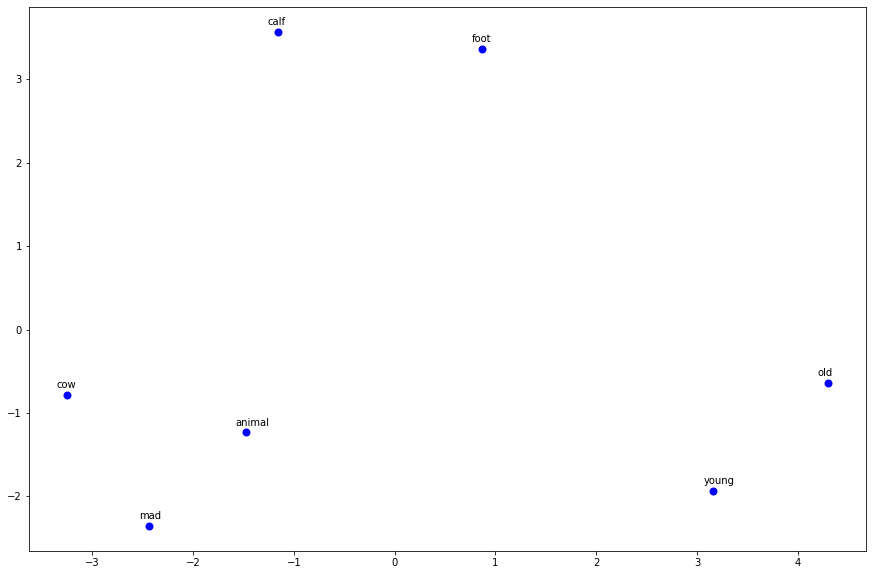

In [ ]:
words_group = ['old', 'young', 'cow', 'calf', 'mad', 'animal', 'foot']
words_group_vectors = [wv_from_bin.get_vector(word) for word in words_group]

words = np.array(words_group)
words_vectors = np.array(words_group_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'blue')

# **Q2**

## Import

In [16]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects

In [17]:
from tensorflow.keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.losses import binary_crossentropy
import os
import pickle
import matplotlib.pyplot as plt

In [18]:
from itertools import permutations
import seaborn as sns
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.svm import SVC

## Load Data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Dataset Embbeding Visualize

In [5]:
# Define our own plot function
def scatter(x, labels, subtitle=None):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    plt.savefig(subtitle)

In [6]:
x_train_flat = x_train.reshape(-1,784)
x_test_flat = x_test.reshape(-1,784)
x_test_flat.shape, x_train_flat.shape

((10000, 784), (60000, 784))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


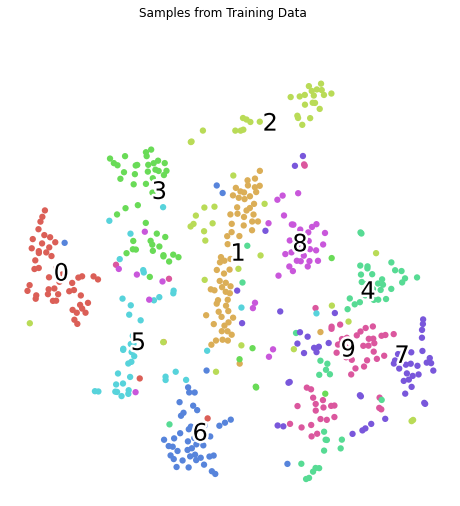

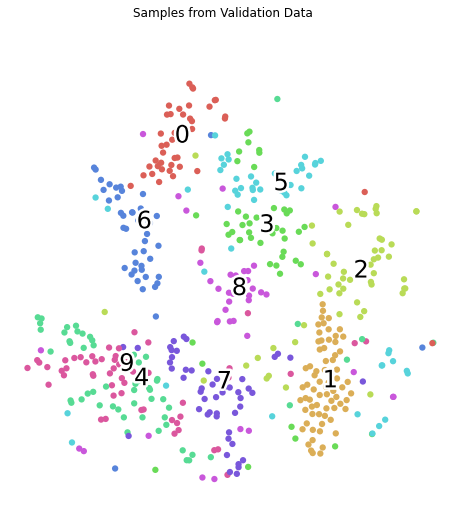

In [7]:
tsne = TSNE()
train_tsne_embeds = tsne.fit_transform(x_train_flat[:512])
scatter(train_tsne_embeds, y_train[:512], "Samples from Training Data")

eval_tsne_embeds = tsne.fit_transform(x_test_flat[:512])
scatter(eval_tsne_embeds, y_test[:512], "Samples from Validation Data")

## Generate Tripplet

In [8]:
def generate_triplet(x,y,testsize=0.3,ap_pairs=10,an_pairs=10):
    data_xy = tuple([x,y])

    trainsize = 1-testsize

    triplet_train_pairs = []
    triplet_test_pairs = []
    for data_class in sorted(set(data_xy[1])):

        same_class_idx = np.where((data_xy[1] == data_class))[0]
        diff_class_idx = np.where(data_xy[1] != data_class)[0]
        A_P_pairs = random.sample(list(permutations(same_class_idx,2)),k=ap_pairs) #Generating Anchor-Positive pairs
        Neg_idx = random.sample(list(diff_class_idx),k=an_pairs)
        

        #train
        A_P_len = len(A_P_pairs)
        Neg_len = len(Neg_idx)
        for ap in A_P_pairs[:int(A_P_len*trainsize)]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_train_pairs.append([Anchor,Positive,Negative])               
        #test
        for ap in A_P_pairs[int(A_P_len*trainsize):]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_test_pairs.append([Anchor,Positive,Negative])    
                
    return np.array(triplet_train_pairs), np.array(triplet_test_pairs)

In [9]:
X_train, X_test = generate_triplet(x_train_flat, y_train, ap_pairs=150, an_pairs=150, testsize=0.2)

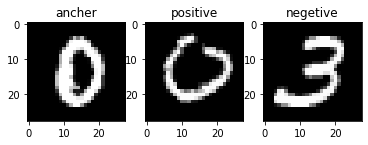

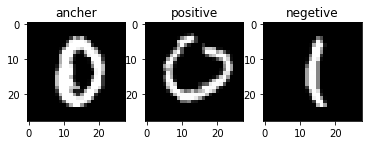

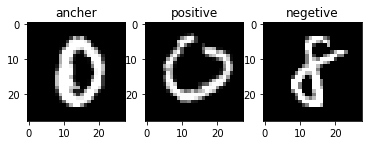

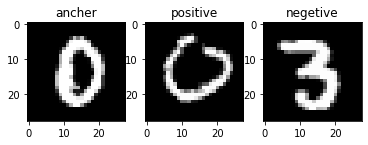

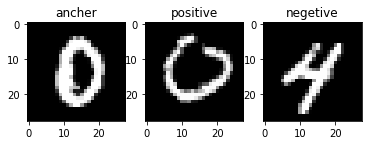

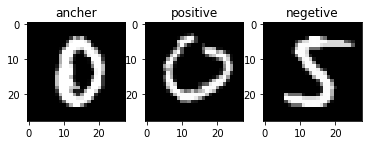

In [10]:
import copy

x=copy.deepcopy(X_train[100:106])
for i in range(len(x)):
    fig, ax =plt.subplots(1, 3)
    ax[0].imshow(x[i][0].reshape((28, 28)), cmap='gray')
    ax[0].set_title('ancher')
    ax[1].imshow(x[i][1].reshape((28, 28)), cmap='gray')
    ax[1].set_title('positive')
    ax[2].imshow(x[i][2].reshape((28, 28)), cmap='gray')
    ax[2].set_title('negetive')


In [11]:
X_train = X_train.transpose(1, 0, 2).reshape((3, 180000, 28, 28))
X_train = [X_train[0], X_train[1], X_train[2]]

X_test = X_test.transpose(1, 0, 2).reshape((3, 45000, 28, 28))
X_test = [X_test[0], X_test[1], X_test[2]]

(len(X_train), X_train[0].shape), (len(X_test), X_test[0].shape)

((3, (180000, 28, 28)), (3, (45000, 28, 28)))

## Tripplet Loss

In [25]:
def identity_loss(y_true, y_pred):
        
    return K.mean(y_pred)

def triplet_loss(y_pred, alpha=0.4):

    anchor, positive, negative = y_pred
    
    dap = K.sum(K.square(anchor-positive),axis=1)
    dan = K.sum(K.square(anchor-negative),axis=1)
    
    loss = K.maximum(dap - dan + alpha, 0)
    return loss

## Embedding Predictions Network

In [26]:
def embedding_pred_net(dim):
    """
    embedding predictions: Base network to be shared
    """

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))

    model.summary()
    return model

## Siamese Network

In [27]:
anchor_in = Input((28,28,1, ), name='input-anchor')
positive_in = Input((28,28,1, ), name='input-positive')
negative_in = Input((28,28,1, ), name='input-negative')

# Shared embedding layer for positive and negative items
embedding_net = embedding_pred_net((28,28,1,))

anchor_embedding = embedding_net(anchor_in)
positive_embedding = embedding_net(positive_in)
negative_embedding = embedding_net(negative_in)

merged_vector = Lambda(triplet_loss)([anchor_embedding, positive_embedding, negative_embedding])

model = Model(inputs=[anchor_in, positive_in, negative_in], outputs=merged_vector)

adam_optim = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(loss=identity_loss, optimizer=adam_optim)

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                      

## Training

In [28]:
model.fit(X_train, np.zeros(180000), epochs=10, batch_size=256, validation_data=[X_test, np.zeros(45000)])

Epoch 1/10
704/704 [==============================] - 47s 53ms/step - loss: 0.0924 - val_loss: 0.0374
Epoch 2/10
704/704 [==============================] - 38s 54ms/step - loss: 0.0248 - val_loss: 0.0227
Epoch 3/10
704/704 [==============================] - 36s 51ms/step - loss: 0.0136 - val_loss: 0.0189
Epoch 4/10
704/704 [==============================] - 38s 54ms/step - loss: 0.0084 - val_loss: 0.0141
Epoch 5/10
704/704 [==============================] - 35s 50ms/step - loss: 0.0060 - val_loss: 0.0150
Epoch 6/10
704/704 [==============================] - 36s 50ms/step - loss: 0.0047 - val_loss: 0.0122
Epoch 7/10
704/704 [==============================] - 38s 53ms/step - loss: 0.0038 - val_loss: 0.0126
Epoch 8/10
704/704 [==============================] - 38s 53ms/step - loss: 0.0030 - val_loss: 0.0099
Epoch 9/10
704/704 [==============================] - 38s 53ms/step - loss: 0.0026 - val_loss: 0.0118
Epoch 10/10
704/704 [==============================] - 35s 50ms/step - loss: 0.002

## Visualize Data Using t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


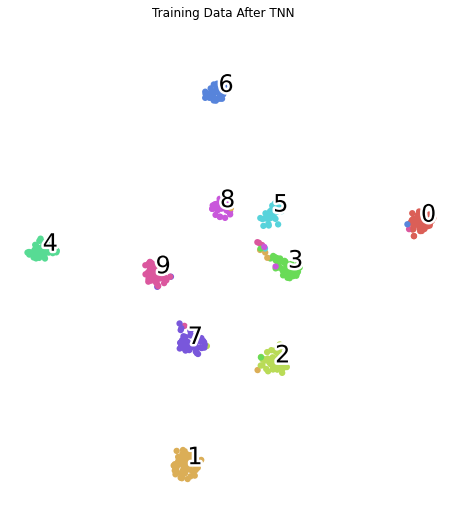

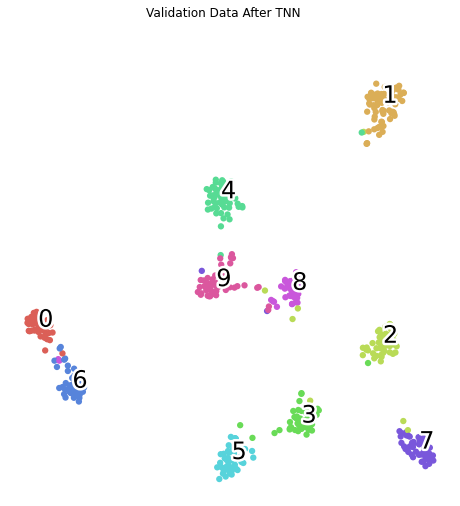

In [29]:
trained_model = Model(inputs=anchor_in, outputs=anchor_embedding)

X_train_trm = trained_model.predict(x_train[:512])
X_test_trm = trained_model.predict(x_test[:512])

tsne = TSNE()

train_tsne_embeds = tsne.fit_transform(X_train_trm)
scatter(train_tsne_embeds, y_train[:512], "Training Data After TNN")

eval_tsne_embeds = tsne.fit_transform(X_test_trm)
scatter(eval_tsne_embeds, y_test[:512], "Validation Data After TNN")

# **Q3**

## Imports

In [42]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns
import numpy as np
import os
import math

## Load DataSet

In [2]:
import numpy as np

!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
data = np.load('Data.npz')
print(data.files)

--2022-01-12 17:01:43--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  12.4MB/s    in 1.5s    

2022-01-12 17:01:46 (12.4 MB/s) - ‘Data.npz’ saved [19725078/19725078]

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


## Visualization

In [3]:
import numpy as np

x_train = data['train_images']
y_train = data['train_labels']

x_val = data['val_images']
y_val = data['val_labels']

x_test = data['test_images']
y_test = data['test_labels']

print('Labels: ', np.unique(y_train))
labels_number = len(np.unique(y_train))

print('train_images shape: ', data['train_images'].shape)
print('train_labels shape: ', data['train_labels'].shape)

print('val_images shape: ', data['val_images'].shape)
print('val_labels shape: ', data['val_labels'].shape)

print('test_images shape: ', data['test_images'].shape)
print('test_labels shape: ', data['test_labels'].shape)

Labels:  [0 1 2 3 4 5 6]
train_images shape:  (7007, 28, 28, 3)
train_labels shape:  (7007, 1)
val_images shape:  (1003, 28, 28, 3)
val_labels shape:  (1003, 1)
test_images shape:  (2005, 28, 28, 3)
test_labels shape:  (2005, 1)


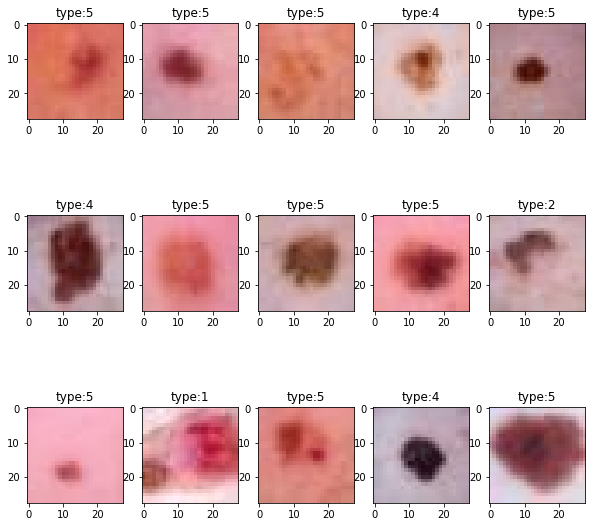

In [4]:
def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(10, 10))
    columns = 5
    rows = 3
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i]
        plt.imshow(img)
        plt.title('type:'+str(y_train[i][0]))
    plt.show()
plot_img(x_train, y_train)

## Unbalancment of data 

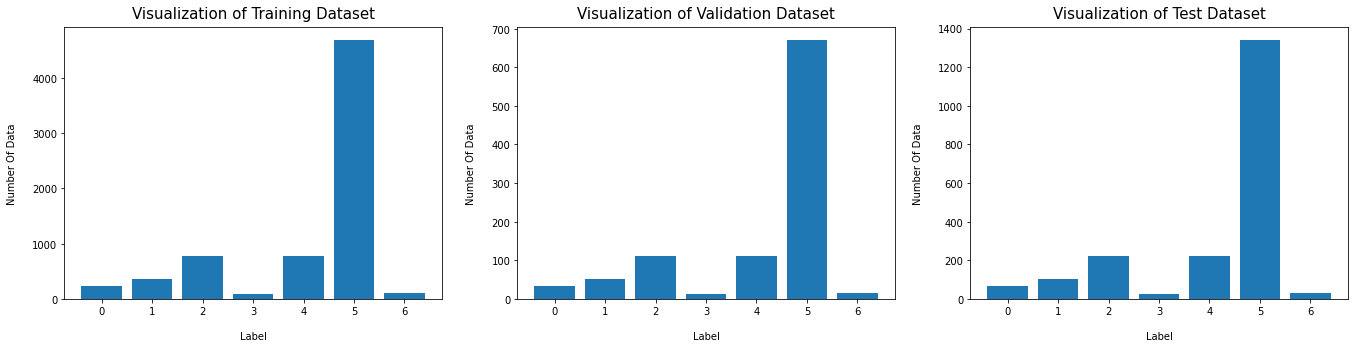

In [5]:
from matplotlib import pyplot as plt

def data_summary(y):
    data = dict()
    for i in range(labels_number):
        data[str(i)] = (int)(np.sum(y==i))
    group_data = list(data.values())
    group_names = list(data.keys())
    return group_data, group_names

def draw_ax(i, group_data, group_names, title):
    ax[i].bar(group_names, group_data)
    ax[i].set_title("Visualization of "+ title , y=1.01, fontsize=15)
    ax[i].set_ylabel("Number Of Data", labelpad=15)
    ax[i].set_xlabel("Label", labelpad=15)

fig, ax = plt.subplots(1, 3, figsize=(23, 5))

group_data, group_names = data_summary(y_train)
draw_ax(0, group_data, group_names, "Training Dataset")

group_data, group_names = data_summary(y_val)
draw_ax(1, group_data, group_names, "Validation Dataset")

group_data, group_names = data_summary(y_test)
draw_ax(2, group_data, group_names, "Test Dataset")

## Preprocess

In [6]:
import tensorflow

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

y_train = tensorflow.keras.utils.to_categorical(y_train, labels_number)
y_val = tensorflow.keras.utils.to_categorical(y_val, labels_number)
y_test = tensorflow.keras.utils.to_categorical(y_test, labels_number)
print(y_train.shape)
print(x_train.shape)

(7007, 7)
(7007, 28, 28, 3)


## Model && Training

In [7]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):

    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [8]:
def resnet_v1(input_shape, depth, num_classes=10):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')

    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=7)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

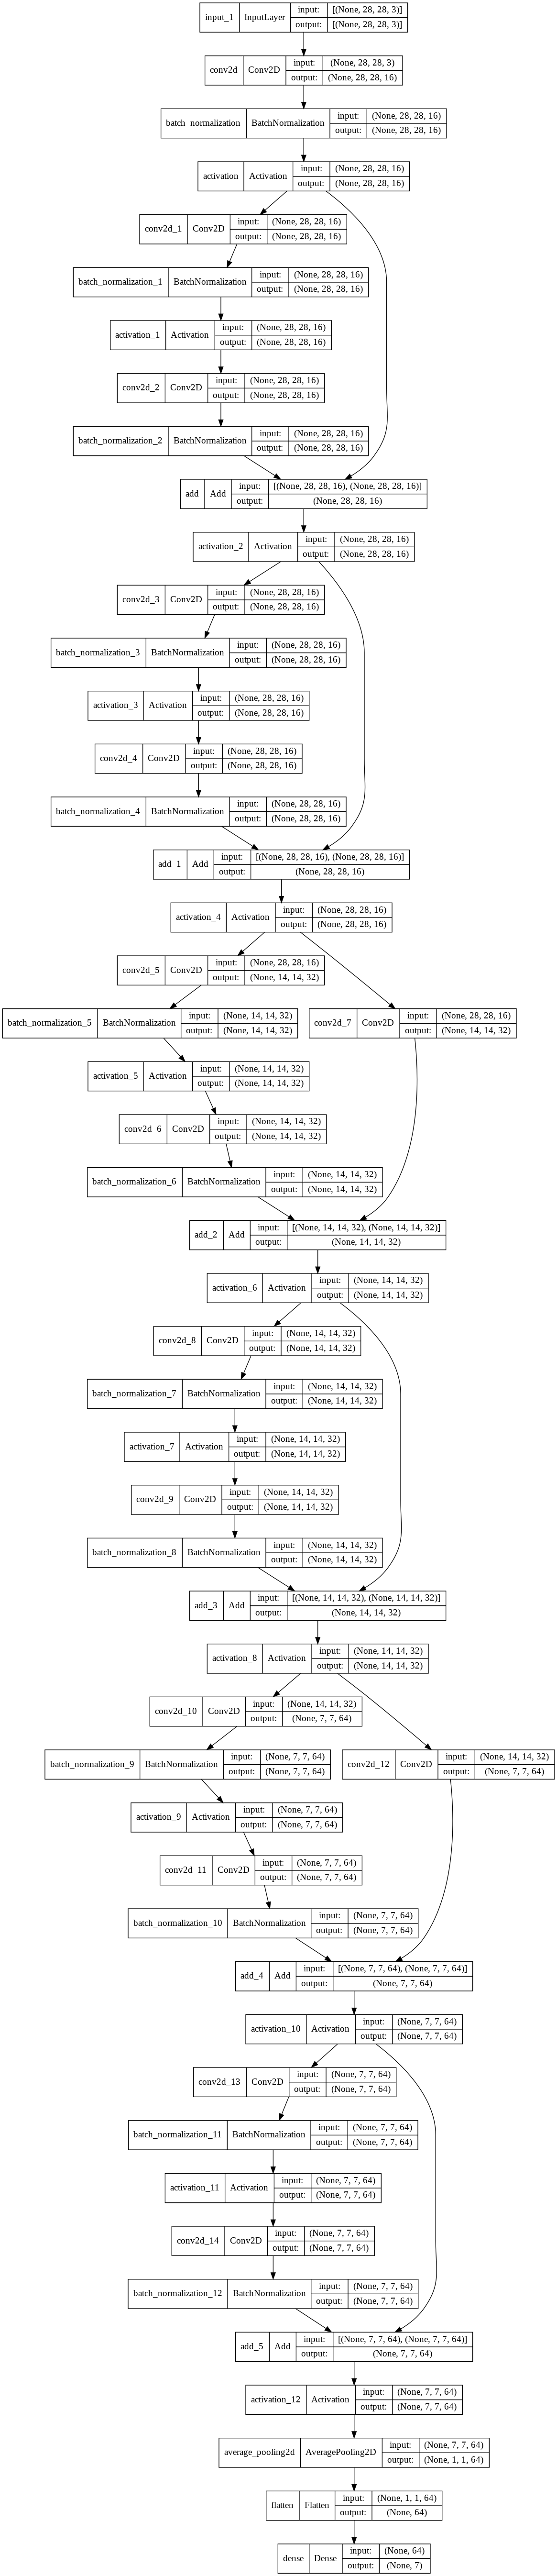

In [9]:
model = resnet_v1(input_shape=(28, 28, 3), depth=14, num_classes=7)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

plot_model(model, to_file='model_q3.png', show_shapes=True, show_layer_names=True)

In [10]:
model.fit(x_train, y_train, epochs=20, validation_data=[x_val, y_val])

Epoch 1/20
219/219 [==============================] - 10s 27ms/step - loss: 1.0610 - accuracy: 0.6690 - val_loss: 1.2919 - val_accuracy: 0.6271
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.9188 - accuracy: 0.6996 - val_loss: 0.9085 - val_accuracy: 0.7099
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.8688 - accuracy: 0.7193 - val_loss: 0.9876 - val_accuracy: 0.7039
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.8301 - accuracy: 0.7306 - val_loss: 0.8459 - val_accuracy: 0.7308
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.8014 - accuracy: 0.7420 - val_loss: 0.8579 - val_accuracy: 0.7368
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.7638 - accuracy: 0.7564 - val_loss: 0.9210 - val_accuracy: 0.6959
Epoch 7/20
219/219 [==============================] - 5s 22ms/step - loss: 0.7326 - accuracy: 0.7618 - val_loss: 0.9894 - val_accuracy: 0.683

In [11]:
loss, acc = model.evaluate(x_test, y_test)
loss, acc

63/63 [==============================] - 1s 12ms/step - loss: 1.7345 - accuracy: 0.5990


(1.7345401048660278, 0.599002480506897)

## statistics

In [40]:
print('CR train\n')
print(classification_report(Y_train, y_train_pred))

print('-' * 100)
print('CR validation\n')
print(classification_report(Y_val, y_val_pred))

print('-' * 100)
print('CR test\n')
print(classification_report(Y_test, y_test_pred))

CR train

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       228
           1       0.98      0.39      0.56       359
           2       0.65      0.97      0.78       769
           3       1.00      0.21      0.35        80
           4       0.47      0.99      0.64       779
           5       1.00      0.79      0.88      4693
           6       0.99      0.84      0.91        99

    accuracy                           0.81      7007
   macro avg       0.84      0.73      0.71      7007
weighted avg       0.89      0.81      0.82      7007

----------------------------------------------------------------------------------------------------
CR validation

              precision    recall  f1-score   support

           0       0.32      0.21      0.25        33
           1       0.60      0.06      0.11        52
           2       0.30      0.57      0.40       110
           3       0.00      0.00      0.00        12
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


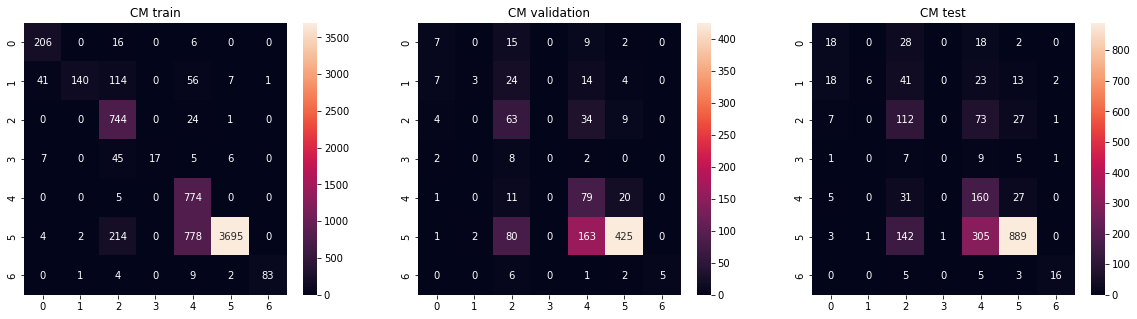

In [50]:
y_train_pred = np.argmax(model.predict(x_train), axis=1)
y_val_pred = np.argmax(model.predict(x_val), axis=1)
y_test_pred = np.argmax(model.predict(x_test), axis=1)

Y_train = np.argmax(y_train, axis=1)
Y_val = np.argmax(y_val, axis=1)
Y_test = np.argmax(y_test, axis=1)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

cm = confusion_matrix(Y_train, y_train_pred)
ax[0].set_title('CM train')
sns.heatmap(cm, annot=True, fmt='g', ax=ax[0])

cm = confusion_matrix(Y_val, y_val_pred)
ax[1].set_title('CM validation')
sns.heatmap(cm, annot=True, fmt='g', ax=ax[1])

cm = confusion_matrix(Y_test, y_test_pred)
ax[2].set_title('CM test')
sns.heatmap(cm, annot=True, fmt='g', ax=ax[2])

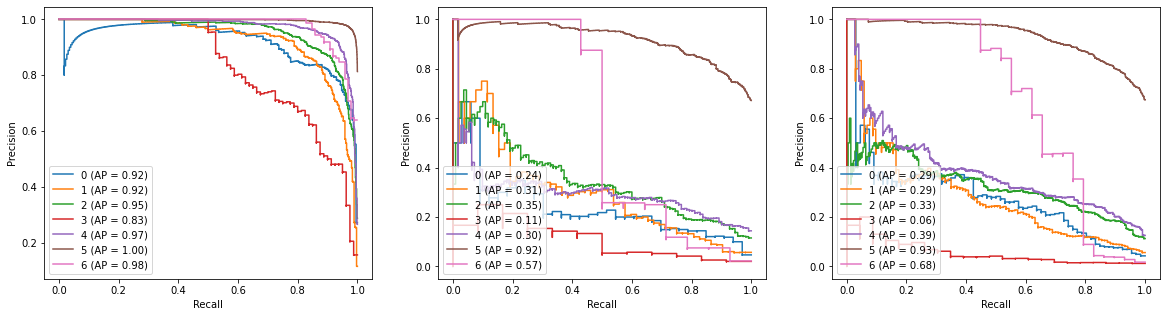

In [51]:
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i in range(7):
    precision, recall, _ = precision_recall_curve(y_train[:, i], y_train_pred[:, i])
    average_precision = average_precision_score(y_train[:, i], y_train_pred[:, i])
    
    display = PrecisionRecallDisplay(recall=recall, precision=precision, average_precision=average_precision)
    display.plot(ax=ax[0], name=str(i))

for i in range(7):
    precision, recall, _ = precision_recall_curve(y_val[:, i], y_val_pred[:, i])
    average_precision = average_precision_score(y_val[:, i], y_val_pred[:, i])
    
    display = PrecisionRecallDisplay(recall=recall, precision=precision, average_precision=average_precision)
    display.plot(ax=ax[1], name=str(i))

for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_test_pred[:, i])
    average_precision = average_precision_score(y_test[:, i], y_test_pred[:, i])
    
    display = PrecisionRecallDisplay(recall=recall, precision=precision, average_precision=average_precision)
    display.plot(ax=ax[2], name=str(i))

# **Q4**

## Import

In [59]:
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 98 kB 3.6 MB/s 


## Loading Data

In [53]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

4431872/4422102 [==============================] - 0s 0us/step


## Base Model

In [55]:
def model_builder():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(units=512, activation='relu'))
  model.add(keras.layers.Dense(10))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [56]:
model = model_builder()
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)


Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5666 - accuracy: 0.8057 - val_loss: 0.4655 - val_accuracy: 0.8358
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4483 - accuracy: 0.8396 - val_loss: 0.4292 - val_accuracy: 0.8496
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4215 - accuracy: 0.8478 - val_loss: 0.4720 - val_accuracy: 0.8291
Epoch 4/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4069 - accuracy: 0.8527 - val_loss: 0.4897 - val_accuracy: 0.8399
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3956 - accuracy: 0.8572 - val_loss: 0.4519 - val_accuracy: 0.8390
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3882 - accuracy: 0.8591 - val_loss: 0.4191 - val_accuracy: 0.8593
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3796 - accuracy: 0.8624 - val_loss: 0.4080 - val_accuracy:

## Keras Tuner

In [57]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(units=hp.Int('dense_layer_units', min_value=16, max_value=512, step=16), activation='relu'))
  model.add(keras.layers.Dense(10))
  lr = hp.Choice('learning_rate', values=[.0001, .0005, .001, .005, .01])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [60]:
tuner = kt.BayesianOptimization(hypermodel=model_builder, objective="val_accuracy", max_trials=3)

tuner.search_space_summary()

Search space summary
Default search space size: 2
dense_layer_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.005, 0.01], 'ordered': True}


In [61]:
tuner.search(img_train, label_train, epochs=50, validation_split=0.2)

Trial 3 Complete [00h 04m 26s]
val_accuracy: 0.8702499866485596

Best val_accuracy So Far: 0.8860833048820496
Total elapsed time: 00h 14m 20s
INFO:tensorflow:Oracle triggered exit


In [63]:
best_hps = tuner.get_best_hyperparameters(5)
model = model_builder(best_hps[0])

model.summary()
tuner.results_summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dense_layer_units: 32
learning_rate: 0.001
Score: 0.8860833048820496
Trial summary
Hyperparameters:
dense_layer_units: 288
learning_rate: 0.005
Score: 0.8800833225250

In [64]:
model.fit(img_train, label_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5867 - accuracy: 0.7977 - val_loss: 0.4724 - val_accuracy: 0.8311
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4230 - accuracy: 0.8509 - val_loss: 0.4172 - val_accuracy: 0.8533
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3902 - accuracy: 0.8603 - val_loss: 0.3850 - val_accuracy: 0.8668
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.8687 - val_loss: 0.4105 - val_accuracy: 0.8564
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3509 - accuracy: 0.8748 - val_loss: 0.3764 - val_accuracy: 0.8706
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3372 - accuracy: 0.8779 - val_loss: 0.3762 - val_accuracy: 0.8648
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3269 - accuracy: 0.8829 - val_loss: 0.3523 - val_accuracy: